In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("Balaji Fast Food Sales.csv")

In [3]:
df["date"] = df["date"].str.replace(r"-", "/", regex= True)
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07/03/2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02/03/2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10/02/2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,NaN,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,NaN,Mrs.,Afternoon


In [4]:
df.isna().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [5]:
modus = df["transaction_type"].mode()[0]
df["transaction_type"].fillna(modus, inplace=True)

In [6]:
df.isna().sum()

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64

In [7]:
df.nunique()

order_id              1000
date                   348
item_name                7
item_type                2
item_price               5
quantity                15
transaction_amount      48
transaction_type         2
received_by              2
time_of_sale             5
dtype: int64

In [8]:
df.describe(include='all')

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
count,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000
unique,NaN,348,7,2,NaN,NaN,NaN,2,2,5
top,NaN,10/11/2022,Cold coffee,Fastfood,NaN,NaN,NaN,Cash,Mr.,Night
freq,NaN,8,161,686,NaN,NaN,NaN,583,512,205
mean,500.500000,NaN,NaN,NaN,33.315000,8.162000,275.230000,NaN,NaN,NaN
std,288.819436,NaN,NaN,NaN,14.921744,4.413075,204.402979,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,20.000000,1.000000,20.000000,NaN,NaN,NaN
25%,250.750000,NaN,NaN,NaN,20.000000,4.000000,120.000000,NaN,NaN,NaN
50%,500.500000,NaN,NaN,NaN,25.000000,8.000000,240.000000,NaN,NaN,NaN
75%,750.250000,NaN,NaN,NaN,50.000000,12.000000,360.000000,NaN,NaN,NaN


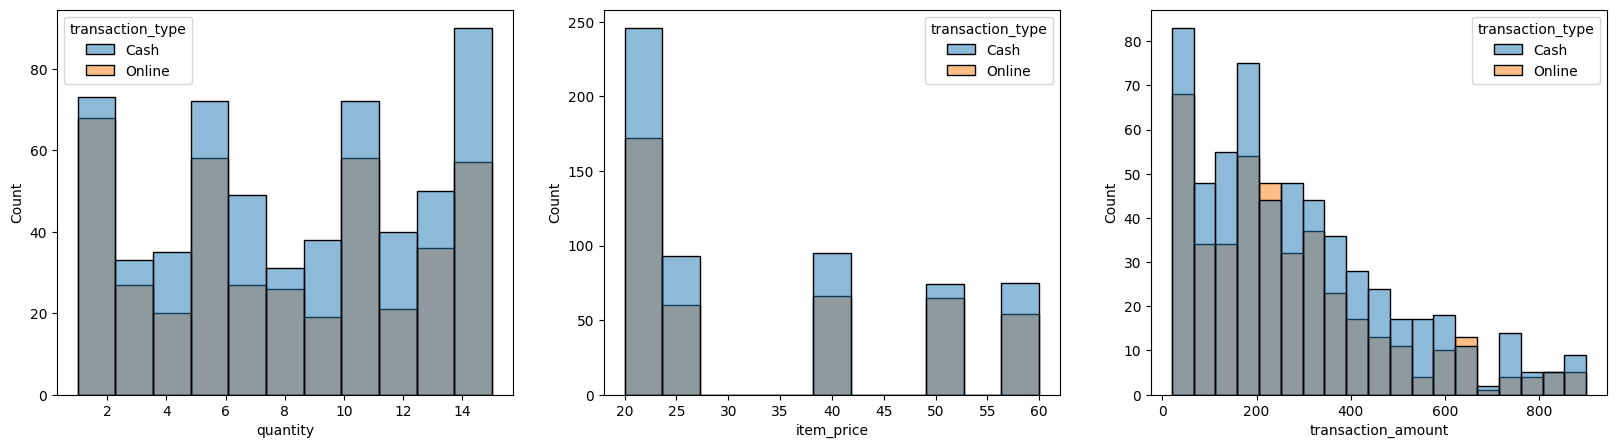

In [9]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))
columns = ['quantity','item_price','transaction_amount']
index = 0
for i in columns:
    sns.histplot(x=i,data=df,ax=ax[index],hue='transaction_type')
    index+=1

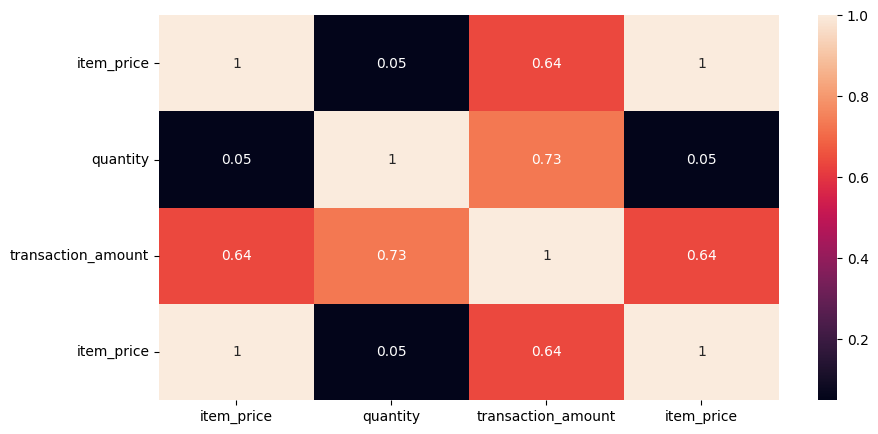

In [10]:
column = ["item_price", "quantity", "transaction_amount",'item_price']
plt.figure(figsize=(10,5))
sns.heatmap(df[column].corr(), annot=True)
plt.show()

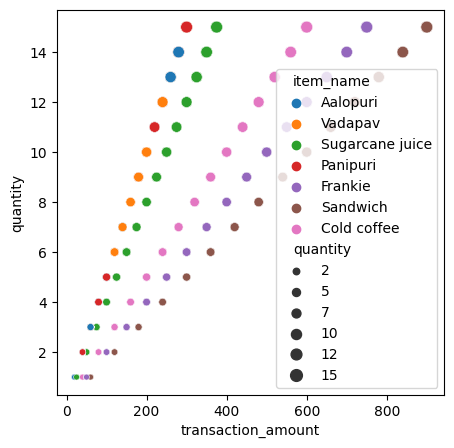

In [11]:
plt.figure(figsize=(5,5))
sns.scatterplot(x="transaction_amount", y="quantity",data=df,hue="item_name", size="quantity")
plt.show()

  received_by  quantity
0         Mr.      4268
1        Mrs.      3894


  time_of_sale  quantity
4        Night      1759
0    Afternoon      1714
2     Midnight      1575
3      Morning      1574
1      Evening      1540


  transaction_type  quantity
0             Cash      4871
1           Online      3291




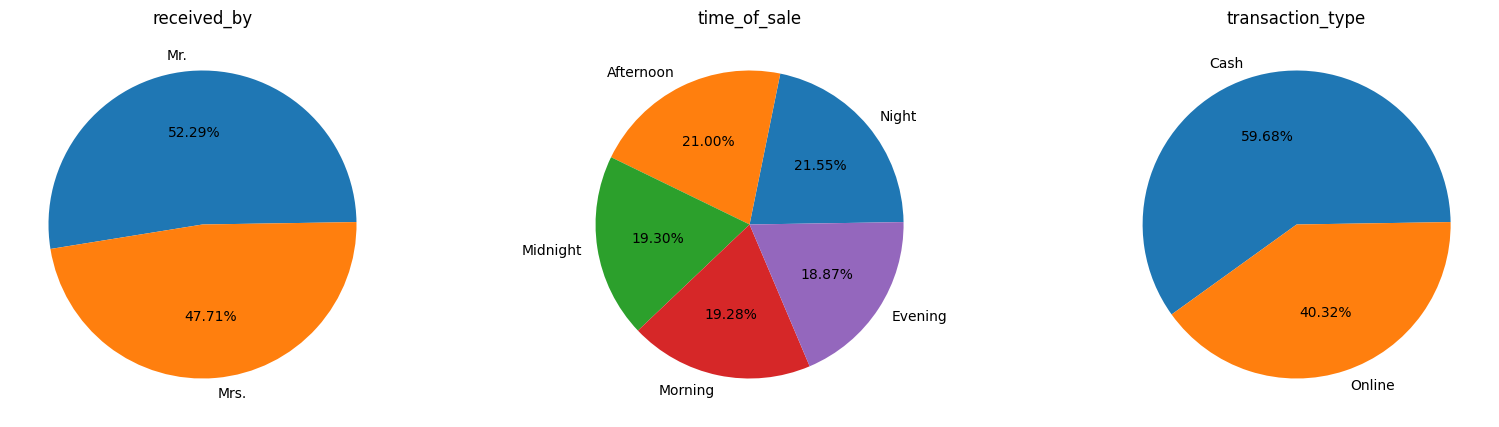

In [12]:
columns = ['received_by','time_of_sale','transaction_type']
fig, ax = plt.subplots(ncols=3, figsize=(20,5))
index_columns = 0
for j in range(0,3):
    data = df.groupby(by = columns[index_columns]).quantity.sum().reset_index().sort_values(by='quantity',ascending=False)
    ax[j].pie(data['quantity'],labels=data[columns[index_columns]],
                 startangle=0.90,autopct='%1.2f%%')
    ax[j].set_title(columns[index_columns])
    index_columns+=1
    print(data)
    print('\n')

         item_name  quantity
1      Cold coffee      1361
5  Sugarcane juice      1278
3         Panipuri      1226
2          Frankie      1150
4         Sandwich      1097
0         Aalopuri      1044
6          Vadapav      1006 

Visualization :


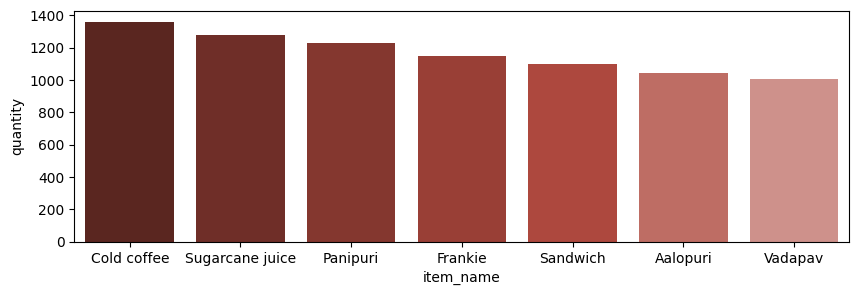

In [13]:
item_quantity = df.groupby(by='item_name',as_index=False).agg({
    'quantity' : 'sum',
}).sort_values(by='quantity',ascending=False)

colors = ["#641E16", "#7B241C", "#922B21", "#A93226", "#C0392B", "#CD6155", "#D98880"]
plt.figure(figsize=(10,3))
sns.barplot(x='item_name',y='quantity',data=item_quantity,palette=colors)
print(item_quantity,'\n\nVisualization :')
plt.show()

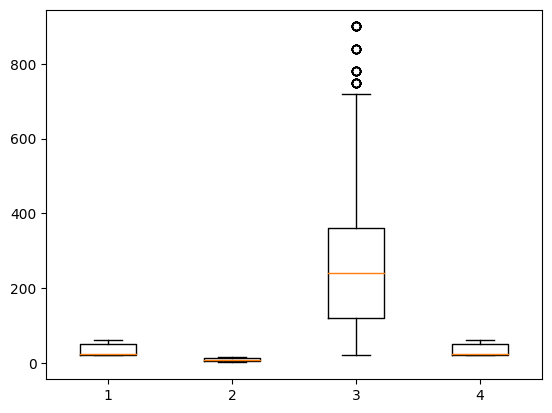

In [14]:
column = ["item_price", "quantity", "transaction_amount",'item_price']
plt.boxplot(df[column])
plt.show()

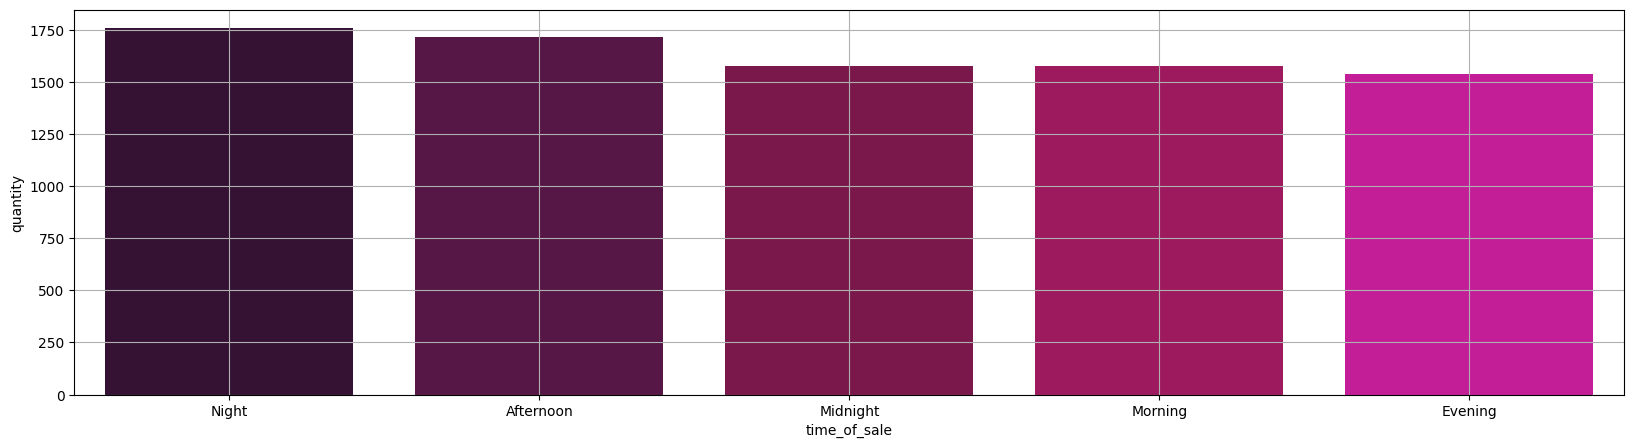

In [15]:
item_quantity = df.groupby(by='time_of_sale',as_index=False).agg({
    'quantity' : 'sum',
}).sort_values(by='quantity',ascending=False)

colors = ["#3B0B39", "#610B4B", "#8A084B", "#B4045F", "#DF01A5"]
plt.figure(figsize=(20,5))
sns.barplot(x='time_of_sale',y='quantity',data=item_quantity,palette=colors)
plt.grid(True)
plt.show()

In [16]:
data_dict = {}
for i in df:
    data_dict[i] = np.array(df[i])

years = []
for i in range(1,len(data_dict['date'])+1):
    output = data_dict['date'][i-1][:2]
    if output[0] == '0':
        output = output.replace('0','',1)
    elif output[1] == '/':
        output = output.replace('/','',1)
    years.append(data_dict['date'][i-1][-4:] + '-'+ output )
data_dict['date'] = years 
df_2 = pd.DataFrame(data_dict)

In [17]:
def sorting(data,columns):
    dataframe = {}
    for j in data:
        dataframe[j] = []
        
    for i in range(0,len(data)):
        for j in data:
            dataframe[j].append(data[j][i])

    dataframe['n_date'] = []
    for i in range(0,len(dataframe[columns][:])):
            length_after = dataframe[columns][i-1]
            urutan = 1
            for teks in length_after:
                if teks == '-':
                    tersisa = len(dataframe[columns][i][urutan:])
                    break
                urutan+=1
            if tersisa == 1:
                dataframe[columns][i] = dataframe[columns][i][:urutan] + '0' + dataframe[columns][i][-1]
            result = dataframe[columns][i].replace('-','',1)
            dataframe['n_date'].append(int(result))
            
    for i in range(0,len(dataframe[columns][:])):
        for j in range(1,len(dataframe['n_date'][:])):
                if dataframe['n_date'][j-1] > dataframe['n_date'][j]:
                    for keys in dataframe:
                        temp = dataframe[keys][j-1]
                        dataframe[keys][j-1] = dataframe[keys][j]
                        dataframe[keys][j] = temp
    del dataframe['n_date']
    return pd.DataFrame(dataframe)

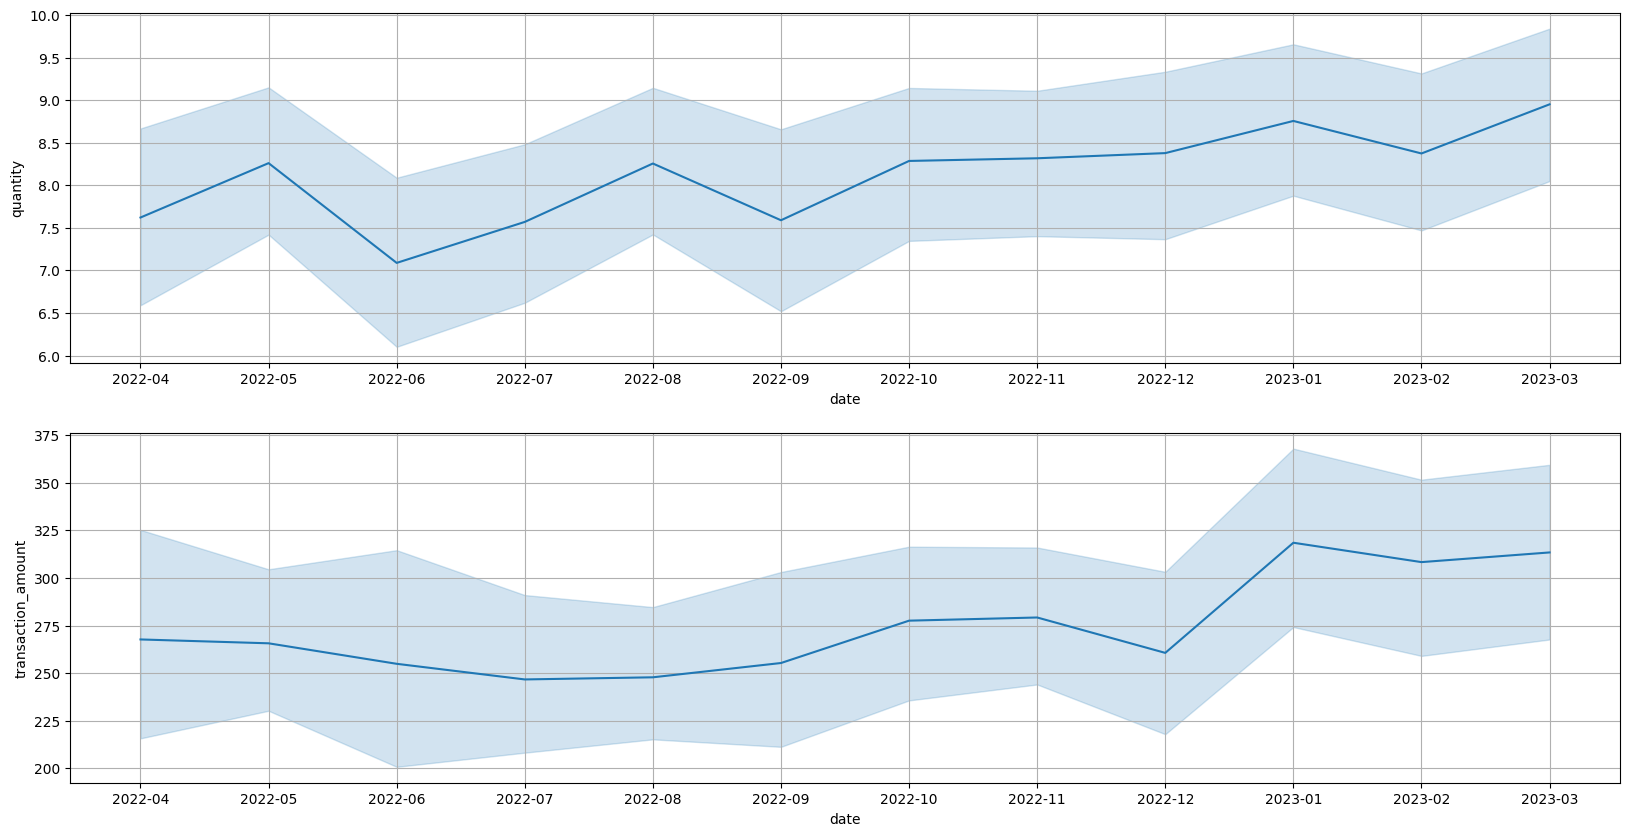

In [18]:
columns = ['quantity','transaction_amount']
based = ['item_type','item_name','time_of_sale']
hehe = sorting(df_2,'date')
fig, ax = plt.subplots(nrows=2, figsize=(20,10))
index=0
for i in range(0,len(columns)):
    sns.lineplot(x='date',y=columns[i],data=hehe,ax=ax[index])
    ax[index].grid(True)
    index+=1

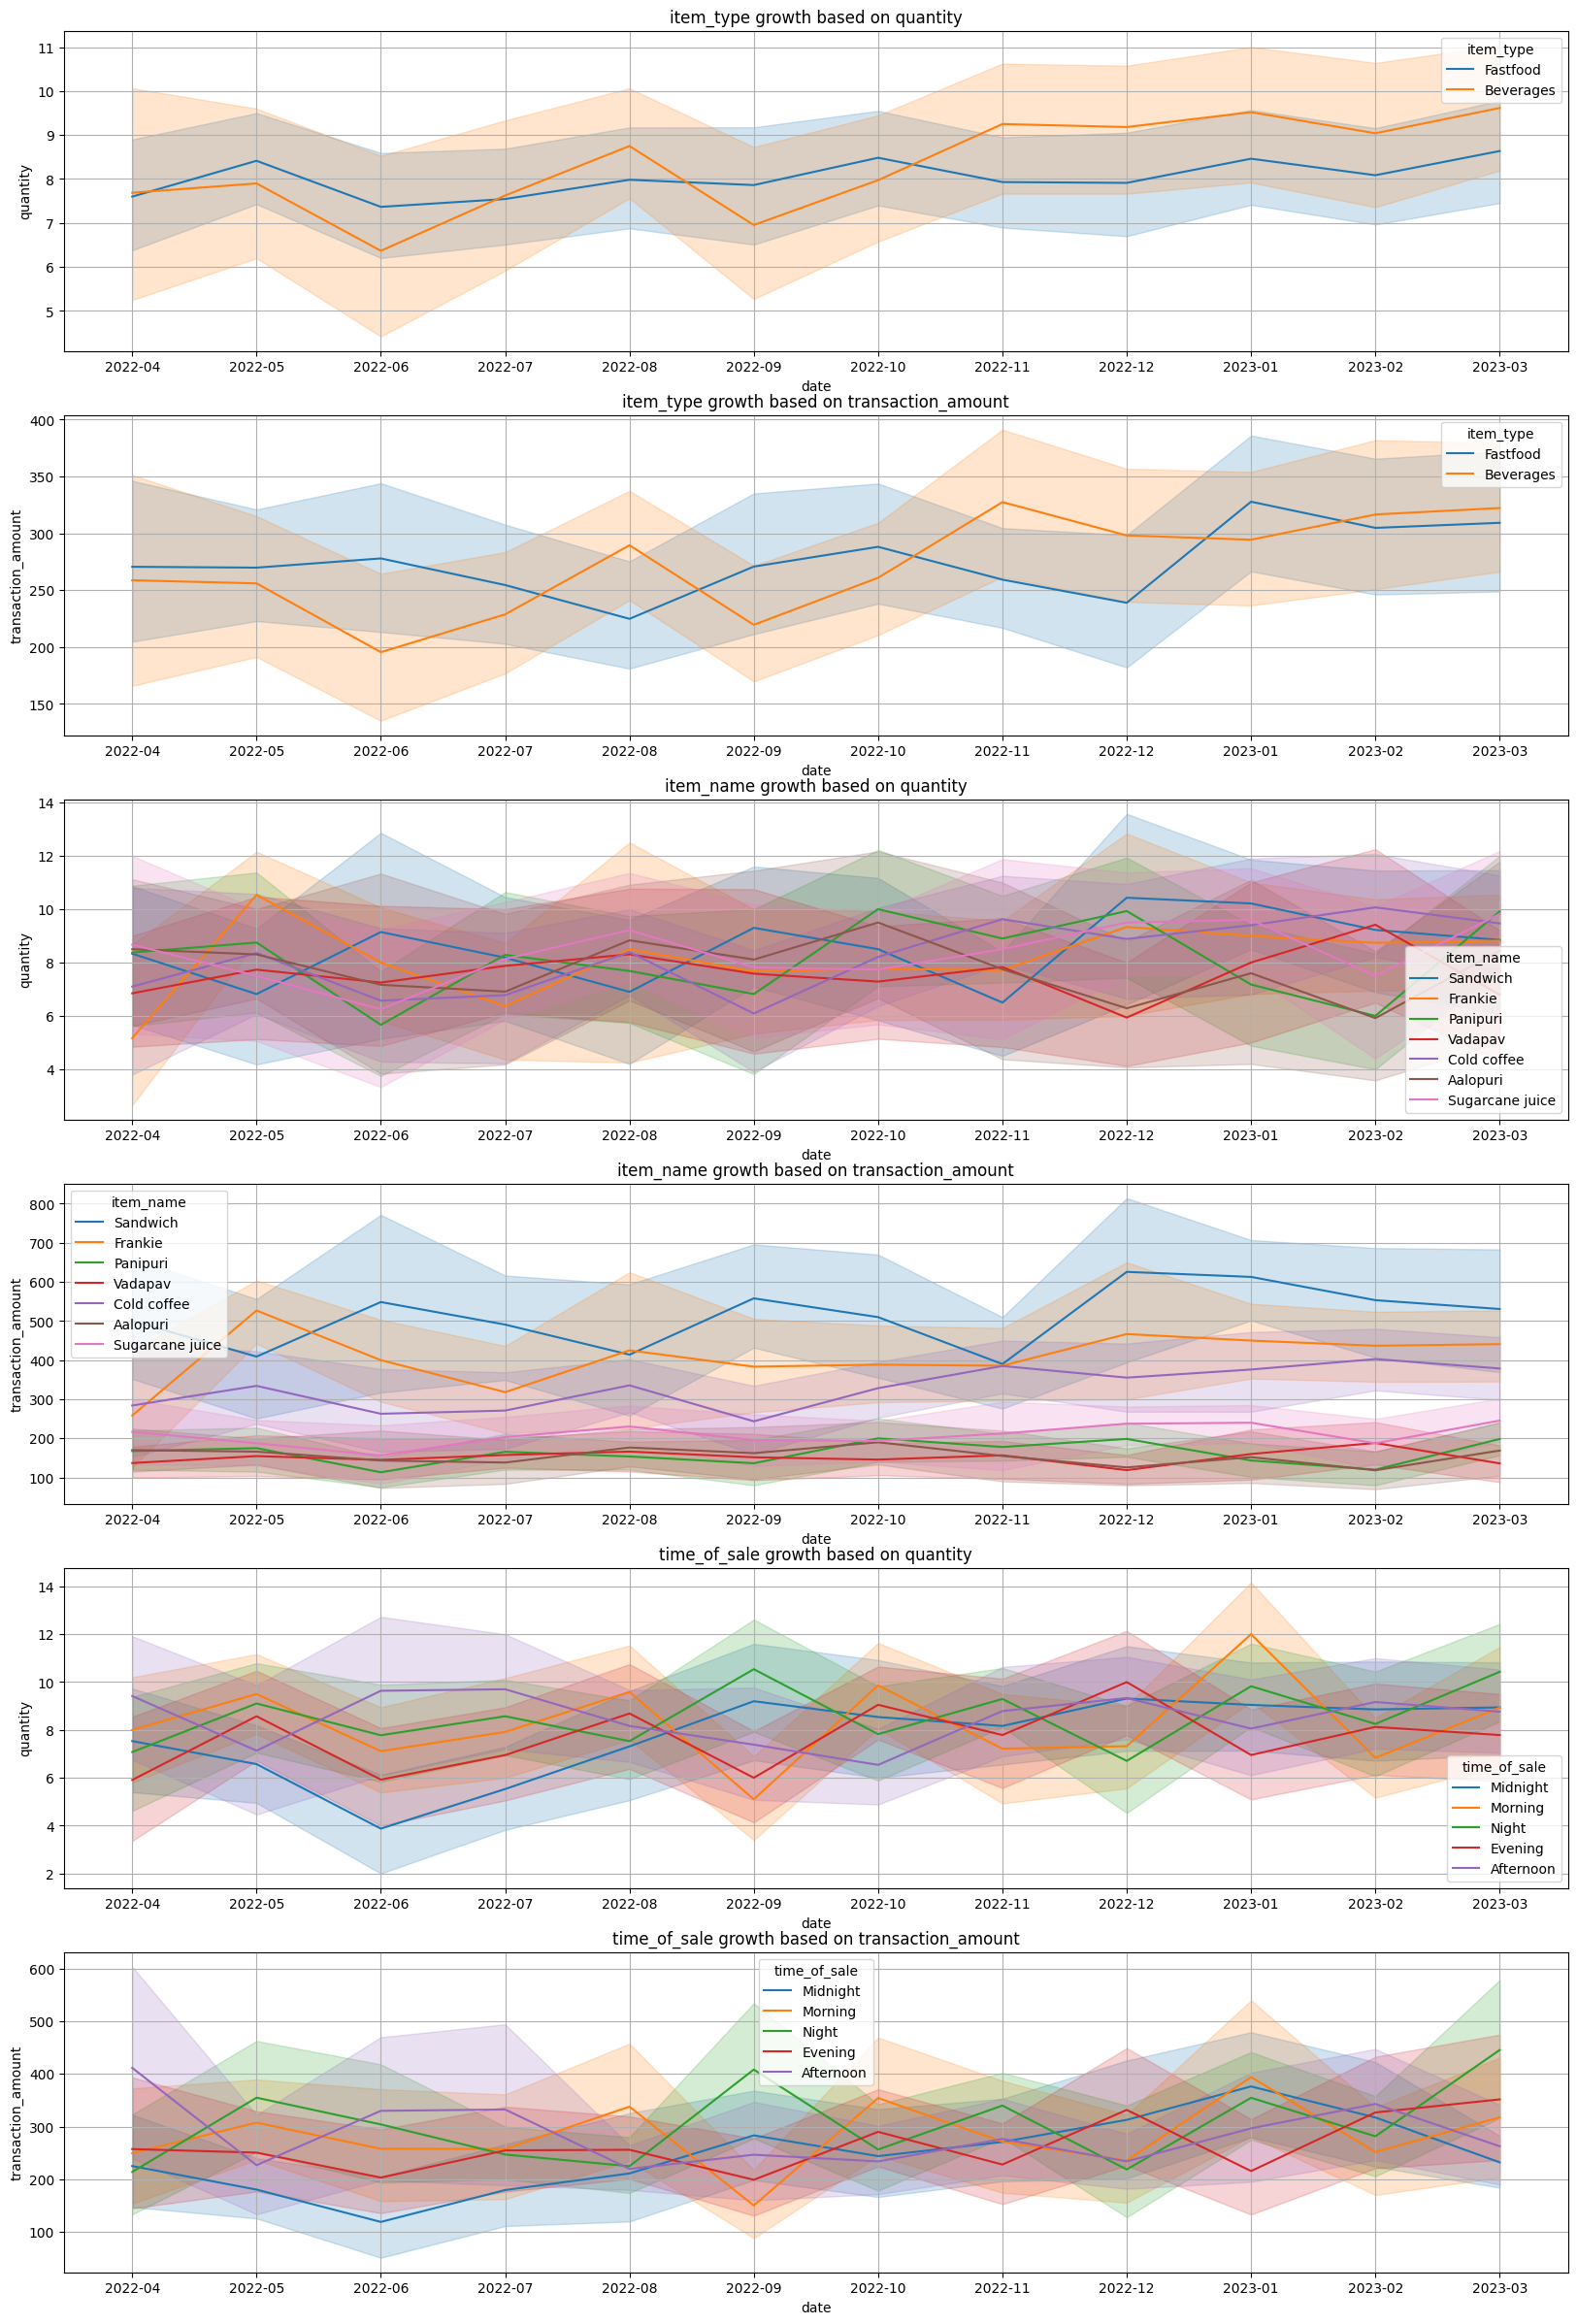

In [19]:
fig, ax = plt.subplots(nrows=6, figsize=(20,30))
index=0
for i in based:
    for j in columns:
        sns.lineplot(x='date',y=j,hue=i,data=hehe,ax=ax[index])
        ax[index].set_title(f"{i} growth based on {j}")
        ax[index].grid(True)
        index+=1

Sandwich
Baris Data :  129
Kenaikan : 0
Penurunan : 0
Konsisten Harga : 128
{'Kenaikan': [], 'Penurunan': [], 'Konsisten': [60]}


Frankie
Baris Data :  139
Kenaikan : 0
Penurunan : 0
Konsisten Harga : 138
{'Kenaikan': [], 'Penurunan': [], 'Konsisten': [50]}


Panipuri
Baris Data :  150
Kenaikan : 0
Penurunan : 0
Konsisten Harga : 149
{'Kenaikan': [], 'Penurunan': [], 'Konsisten': [20]}


Vadapav
Baris Data :  134
Kenaikan : 0
Penurunan : 0
Konsisten Harga : 133
{'Kenaikan': [], 'Penurunan': [], 'Konsisten': [20]}


Cold coffee
Baris Data :  161
Kenaikan : 0
Penurunan : 0
Konsisten Harga : 160
{'Kenaikan': [], 'Penurunan': [], 'Konsisten': [40]}


Aalopuri
Baris Data :  134
Kenaikan : 0
Penurunan : 0
Konsisten Harga : 133
{'Kenaikan': [], 'Penurunan': [], 'Konsisten': [20]}


Sugarcane juice
Baris Data :  153
Kenaikan : 0
Penurunan : 0
Konsisten Harga : 152
{'Kenaikan': [], 'Penurunan': [], 'Konsisten': [25]}


total Akumulasi Baris :  993


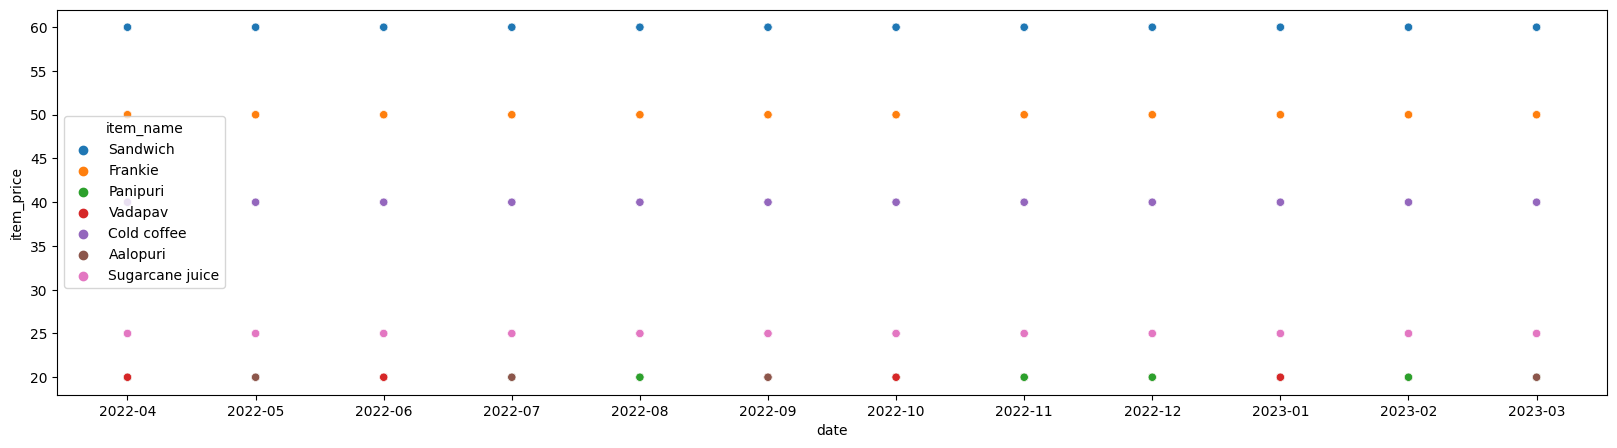

In [20]:
validation_total = 0

for i in hehe['item_name'].unique():
    print(i)
    data = hehe[hehe['item_name']==i].reset_index()
    print("Baris Data : ",len(data))
    print('='*50)
    kenaikan = 0
    penurunan = 0
    konsisten = 0

    group = {
        
    'Kenaikan' : [],
    'Penurunan' : [],
    'Konsisten' : []
    }

    for check in range(1,len(data)):
        if data['item_price'][check-1] < data['item_price'][check]:
            kenaikan+=1
            if data['item_price'][check-1] not in group['Kenaikan']:
                group['Kenaikan'].append(data['item_price'][check])
            else:
                pass
        elif data['item_price'][check-1] > data['item_price'][check]:
            penurunan+=1
            if data['item_price'][check-1] not in group['Penurunan']:
                group['Penurunan'].append(data['item_price'][check])
            else:
                pass
        elif data['item_price'][check-1] == data['item_price'][check]:
            konsisten+=1
            if data['item_price'][check-1] not in group['Konsisten']:
                group['Konsisten'].append(data['item_price'][check])
            else:
                pass

    print(f"Kenaikan : {kenaikan}\nPenurunan : {penurunan}\nKonsisten Harga : {konsisten}\n{group}")
    validation_total = validation_total + (kenaikan+penurunan+konsisten)
    print('\n')
print("total Akumulasi Baris : ", validation_total)
plt.figure(figsize=(20,5))
sns.scatterplot(x='date',y='item_price',hue='item_name',data=hehe)
plt.show()

In [21]:
def max_produk(dataframe,column,produk,groupby):
    high_produk = {
    'Season': [],
    'produk': [],
    'Max Transaction Amount': [],
    }
    max_value = dataframe[column][0]
    product = dataframe[produk][0]
    for i in range(1, len(dataframe)):
        if dataframe[groupby][i-1] != dataframe[groupby][i]:
            high_produk['Season'].append(dataframe[groupby][i-1])
            high_produk['Max Transaction Amount'].append(max_value)
            high_produk['produk'].append(product)
            max_value = dataframe[column][i]
            product = dataframe[produk][i]
        else:
            if max_value < dataframe[column][i]:
                max_value = dataframe[column][i]
                product = dataframe[produk][i]
    high_produk['Season'].append(dataframe[groupby].iloc[-1])
    high_produk['Max Transaction Amount'].append(max_value)
    high_produk['produk'].append(product)
    return pd.DataFrame(high_produk)
high_produk = max_produk(hehe,'transaction_amount','item_name','date')
high_produk

,Season,produk,Max Transaction Amount
0,2022-04,Sandwich,900
1,2022-05,Sandwich,900
2,2022-06,Sandwich,900
3,2022-07,Sandwich,900
4,2022-08,Sandwich,900
5,2022-09,Sandwich,900
6,2022-10,Sandwich,840
7,2022-11,Frankie,750
8,2022-12,Sandwich,900
9,2023-01,Sandwich,900


In [22]:
def groupby_sort(dataframe,columns):
    season = {}
    for i in dataframe:
        data = []
        ada = False
        season[i] = []
    for time in dataframe[columns].unique():
        for k in range(0,len(hehe[columns][:])):
            if dataframe[columns][k] ==time:
                for key in season:
                    season[key].append(hehe[key][k])
    return pd.DataFrame(season)

In [23]:
season = groupby_sort(hehe,'time_of_sale')
high_produk = max_produk(season,'transaction_amount','item_name','time_of_sale')
high_produk

,Season,produk,Max Transaction Amount
0,Midnight,Sandwich,900
1,Morning,Sandwich,900
2,Night,Sandwich,900
3,Evening,Sandwich,840
4,Afternoon,Sandwich,900


In [24]:
item_type = groupby_sort(hehe,'item_type')
high_produk = max_produk(item_type,'transaction_amount','item_name','item_type')
high_produk

,Season,produk,Max Transaction Amount
0,Fastfood,Sandwich,900
1,Beverages,Cold coffee,600


In [25]:
def catch(dataframe,category1,value_categori1,category2,value_categori2):
    
    data = {}
    for j in dataframe:
        data[j] = []
        
    for i in range(0,len(dataframe)):
        if dataframe[category1][i] == value_categori1 and dataframe[category2][i] == value_categori2:
            for j in dataframe:
                data[j].append(dataframe[j][i])
    return pd.DataFrame(data)

In [26]:
Sandwich = catch(hehe,'item_name','Sandwich','transaction_amount',900)
catch = catch(hehe,'item_name','Cold coffee','transaction_amount',600)

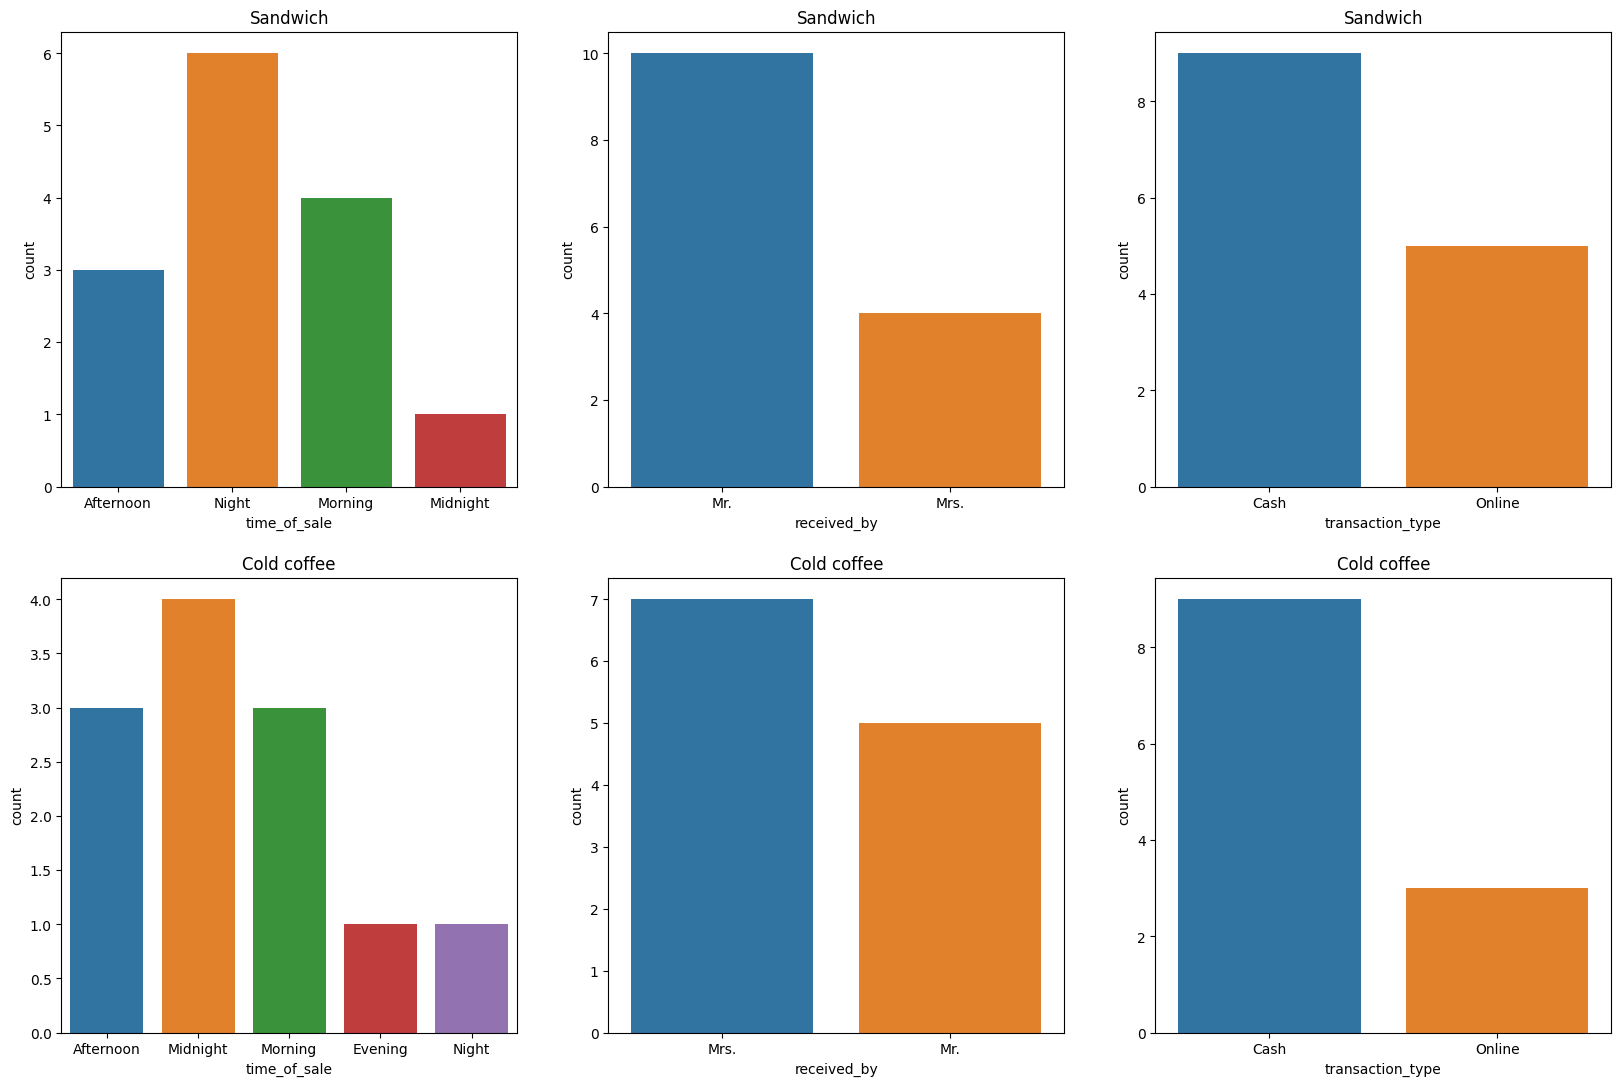

In [27]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(20,13))
list_data = [Sandwich,catch]
columns = ['time_of_sale','received_by','transaction_type']
title = ["Sandwich","Cold coffee"]
for b in range(0,2):
    for i in range(0,3):
        sns.countplot(x=columns[i],data=list_data[b],ax=ax[b][i])
        ax[b][i].set_title(title[b])
plt.show()

In [28]:
data_dict = {}
for i in df:
    data_dict[i] = np.array(df[i])
    
years = []

for i in range(0,len(data_dict['date'])):
    output = data_dict['date'][i][:2]
    if output[0] == '0':
        output = output.replace('0','',1)
    elif output[1] == '/':
        output = output.replace('/','',1)

    output2 = data_dict['date'][i][2:5]
    if output2[0] == '/' or output2[2] == '/':
        output2 = output2.replace('/','',2)
    years.append(output + '/' + output2 + '/' + data_dict['date'][i][-4:])

ada_0 = False
for i in years:
    if i[0:2] == '0/':
        ada_0 = True
if ada_0 == False:
    print("Tidak Ada 0")
    #add Data
    data_dict['date']=years
    data = pd.DataFrame(data_dict)
else:
    print("Ada 0")

Tidak Ada 0


In [29]:
data.to_csv('data.csv')

# Link DashBoard
https://lookerstudio.google.com/u/0/reporting/fb98245c-860c-4241-ac31-5becd7a27418/page/1cd6D
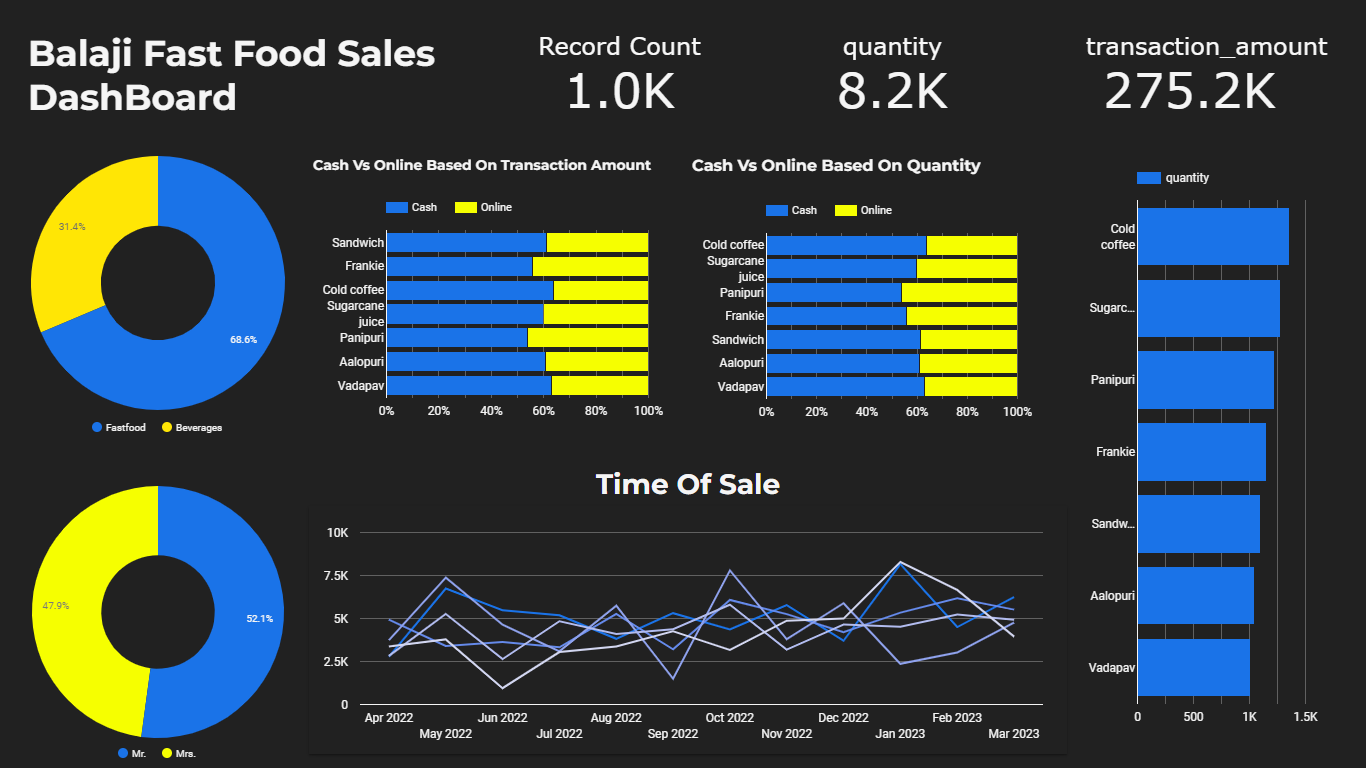